In [2]:
import numpy as numpy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random 
random.seed(0)

In [3]:
data=pd.read_csv('FuelConsumption.csv')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067 entries, 0 to 1066
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MODELYEAR                 1067 non-null   int64  
 1   MAKE                      1067 non-null   object 
 2   MODEL                     1067 non-null   object 
 3   VEHICLECLASS              1067 non-null   object 
 4   ENGINESIZE                1067 non-null   float64
 5   CYLINDERS                 1067 non-null   int64  
 6   TRANSMISSION              1067 non-null   object 
 7   FUELTYPE                  1067 non-null   object 
 8   FUELCONSUMPTION_CITY      1067 non-null   float64
 9   FUELCONSUMPTION_HWY       1067 non-null   float64
 10  FUELCONSUMPTION_COMB      1067 non-null   float64
 11  FUELCONSUMPTION_COMB_MPG  1067 non-null   int64  
 12  CO2EMISSIONS              1067 non-null   int64  
dtypes: float64(4), int64(4), object(5)
memory usage: 108.5+ KB


In [5]:
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [6]:
data.drop(columns=['MODELYEAR','MAKE','MODEL','VEHICLECLASS'],inplace=True)

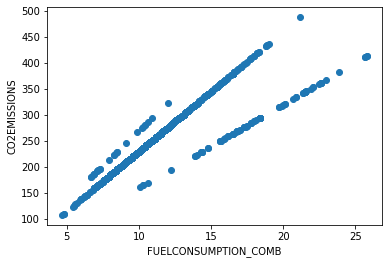

In [8]:
plt.scatter(data[["FUELCONSUMPTION_COMB"]],data[["CO2EMISSIONS"]])
plt.xlabel('FUELCONSUMPTION_COMB')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [9]:
X=data[['FUELCONSUMPTION_COMB']]
Y=data[['CO2EMISSIONS']]
X.head()

,FUELCONSUMPTION_COMB
0,8.5
1,9.6
2,5.9
3,11.1
4,10.6


In [10]:
Y.head()

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244


<AxesSubplot:>

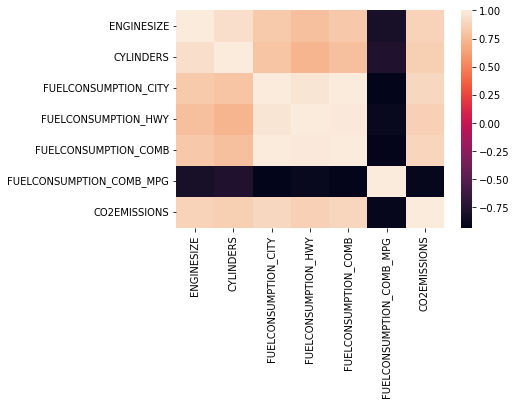

In [11]:
corr=data.corr()
sns.heatmap(corr)

In [12]:
from sklearn.model_selection import train_test_split
Xtrain,Xtest,Ytrain,Ytest=train_test_split(X,Y,test_size=0.2,random_state=0)

In [13]:
Xtrain.shape
Ytrain.shape

(853, 1)

In [14]:
Xtest.shape
Ytest.shape


(214, 1)

In [15]:
from sklearn.linear_model import LinearRegression

model=LinearRegression()
model.fit(Xtrain.values,Ytrain.values)

LinearRegression()

In [17]:
yhat=model.predict(Xtest)
yhat

array([[318.81954758],
       [216.8411235 ],
       [231.18183938],
       [218.43453637],
       [188.15969172],
       [274.20398704],
       [218.43453637],
       [263.05009691],
       [212.06088487],
       [302.88541882],
       [288.54470293],
       [374.58899825],
       [204.09382048],
       [266.23692266],
       [194.53334323],
       [251.89620677],
       [358.65486949],
       [226.40160075],
       [245.52255527],
       [320.41296046],
       [204.09382048],
       [202.50040761],
       [240.74231664],
       [239.14890376],
       [162.6650857 ],
       [267.83033554],
       [261.45668403],
       [365.02852099],
       [242.33572952],
       [148.32436981],
       [320.41296046],
       [237.55549089],
       [299.69859306],
       [235.96207801],
       [204.09382048],
       [207.28064624],
       [275.79739992],
       [224.80818788],
       [235.96207801],
       [235.96207801],
       [199.31358186],
       [199.31358186],
       [212.06088487],
       [186

In [18]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error

In [19]:
mean_squared_error(yhat,Ytest)

746.3207459061316

In [20]:
100-mean_absolute_percentage_error(yhat,Ytest)*100

92.32572402010865

In [41]:
from sklearn.model_selection import KFold

low = 0
up = data.shape[0]
folds = KFold(n_splits=3)

for train, test in folds.split(range(low,up)):

      x=X.iloc[train]
      y=Y.iloc[train]

      xt=X.iloc[test]
      yt=Y.iloc[test]

      model=LinearRegression()

      model.fit(X,Y)

      yhat=model.predict(xt.values)

      print("MAE:",100-mean_absolute_percentage_error(yhat,yt)*100)
      print("MSE:",mean_squared_error(yhat,yt))

MAE: 92.37511631836276
MSE: 1004.7355280548228
MAE: 91.95466831402315
MSE: 1036.7788257627121
MAE: 93.85613604229229
MSE: 414.1498981212975
